# Churn_Modelling

Customers of a big international bank, who decided to leave (Exited) from the bank.

In [144]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,accuracy_score

In [54]:
data=pd.read_csv('Churn_Modelling.csv')

In [55]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
data.shape

(10000, 14)

There are 10000 records in dataset

In [57]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


First is to delete irrelevant and variables

In [58]:
len(set(data['RowNumber']))

10000

In [59]:
len(set(data['CustomerId']))

10000

RowNumber and CustomerId unique, therefore no predictive power. Can be deleted
<br> Surname should also be no predictive power.Cal also be deleted

In [60]:
del data['RowNumber']
del data['CustomerId']
del data['Surname']

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Next step is to convert categorical variables into dummies 

In [62]:
data=pd.get_dummies(data)

In [63]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


## Visual data

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj,

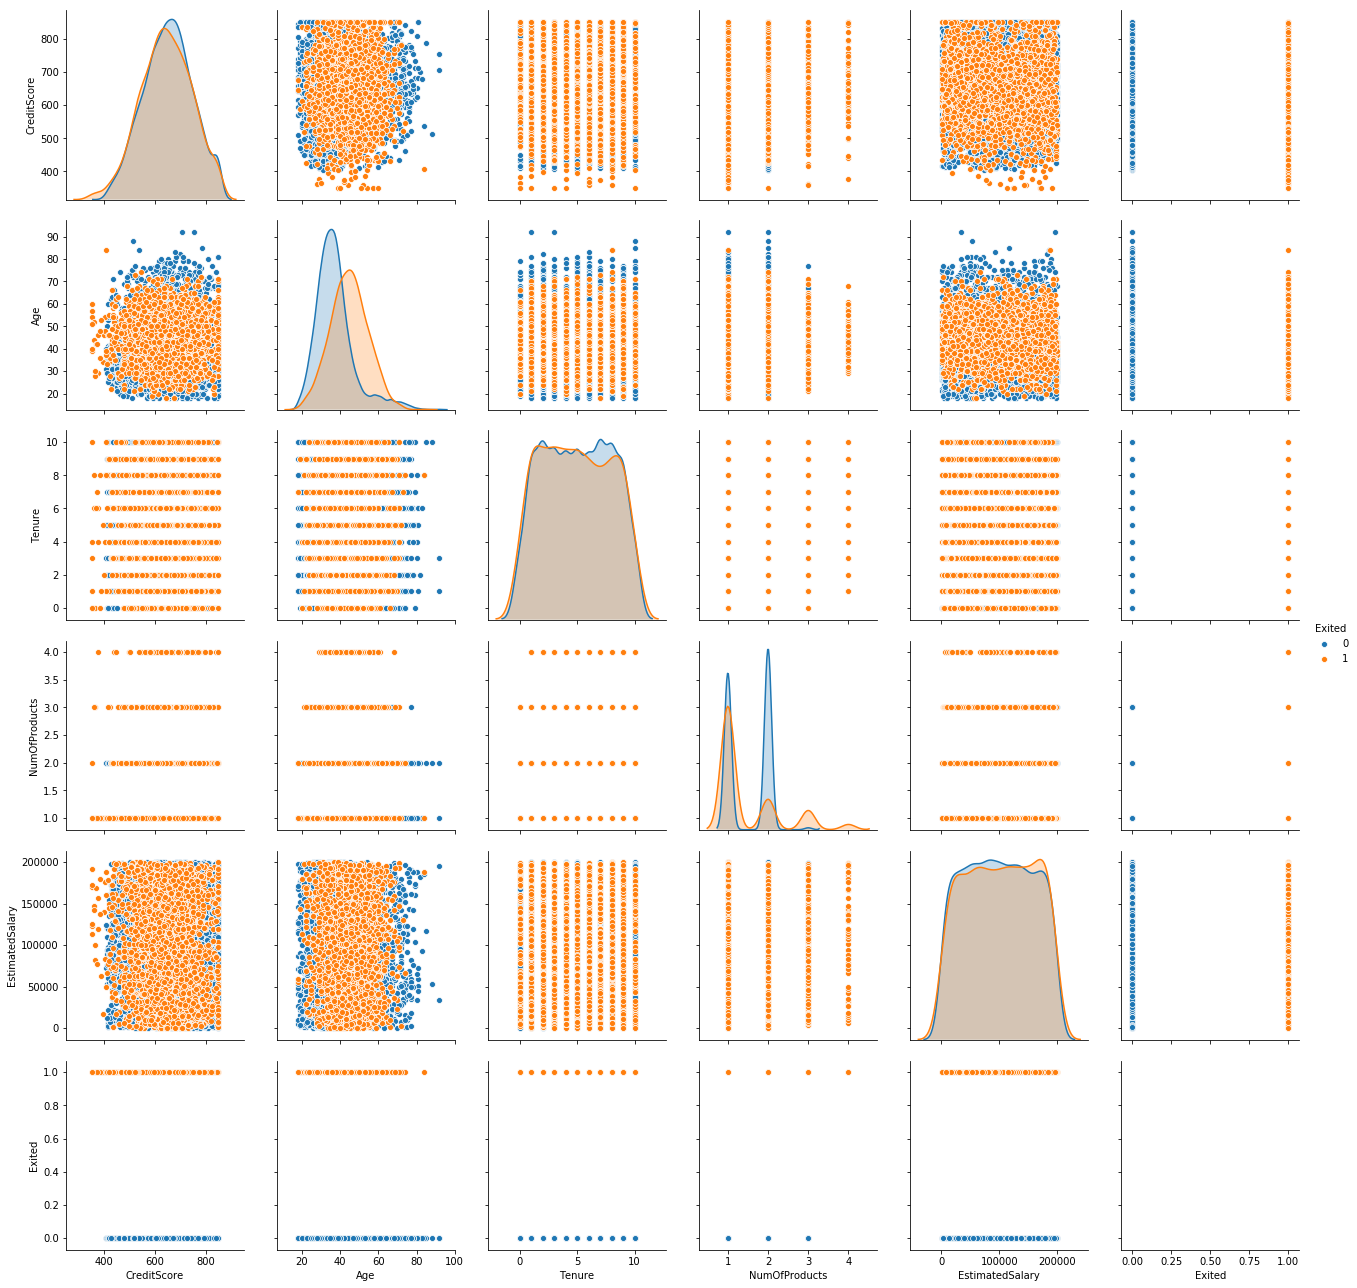

In [64]:
sns.pairplot(data[['CreditScore','Age','Tenure','NumOfProducts','EstimatedSalary','Exited']],hue='Exited',height=3)

In [65]:
correlation = data.corr()

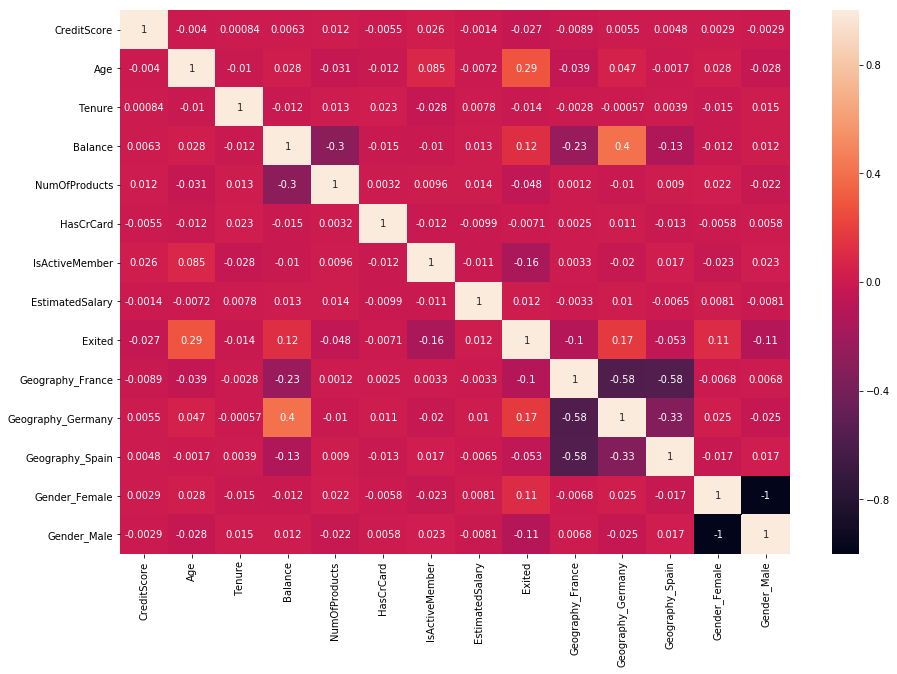

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation,annot=True)
plt.show()

## Modelling

Try to use neural network model and see if can predict churning

First step is to separate training set and test set 

In [94]:
data_x=data[data.columns.difference(['Exited'])]
data_y=data['Exited']
scaler=MinMaxScaler(feature_range=(0,1))
data_x=scaler.fit_transform(data_x)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,test_size=0.3)

Second step is to build keral model

In [99]:
def keralmodel():
    model = Sequential()
    model.add(Dense(13,input_dim=13,kernel_initializer='normal'))
    model.add(Dense(5,kernel_initializer='normal'))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [103]:
estimator=KerasRegressor(build_fn=keralmodel, epochs=20 )
kfold = KFold(n_splits=10, random_state=42)
results = cross_val_score(estimator, X_train, y_train, cv=kfold) 
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Epoch 1/20
6300/6300 [==============================] - 1s 151us/step - loss: 0.1892
Epoch 2/20
6300/6300 [==============================] - 0s 39us/step - loss: 0.1560
Epoch 3/20
6300/6300 [==============================] - 0s 39us/step - loss: 0.1511
Epoch 4/20
6300/6300 [==============================] - 0s 39us/step - loss: 0.1482
Epoch 5/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1455
Epoch 6/20
6300/6300 [==============================] - 0s 39us/step - loss: 0.1427
Epoch 7/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1397
Epoch 8/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1379
Epoch 9/20
6300/6300 [==============================] - 0s 41us/step - loss: 0.1367
Epoch 10/20
6300/6300 [==============================] - 0s 41us/step - loss: 0.1362
Epoch 11/20
6300/6300 [==============================] - 0s 39us/step - loss: 0.1361
Epoch 12/20
6300/6300 [==============================] - 0s 40us/step - l

6300/6300 [==============================] - 0s 42us/step - loss: 0.1365
Epoch 16/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1366
Epoch 17/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1365
Epoch 18/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1363
Epoch 19/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1364
Epoch 20/20
700/700 [==============================] - 0s 530us/step
Epoch 1/20
6300/6300 [==============================] - 1s 169us/step - loss: 0.1873
Epoch 2/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1552
Epoch 3/20
6300/6300 [==============================] - 0s 41us/step - loss: 0.1509
Epoch 4/20
6300/6300 [==============================] - 0s 41us/step - loss: 0.1478
Epoch 5/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1455
Epoch 6/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1429
Epoch 7/20
63

6300/6300 [==============================] - 0s 44us/step - loss: 0.1374
Epoch 9/20
6300/6300 [==============================] - 0s 42us/step - loss: 0.1362
Epoch 10/20
6300/6300 [==============================] - 0s 42us/step - loss: 0.1360
Epoch 11/20
6300/6300 [==============================] - 0s 40us/step - loss: 0.1356
Epoch 12/20
6300/6300 [==============================] - 0s 44us/step - loss: 0.1357
Epoch 13/20
6300/6300 [==============================] - 0s 42us/step - loss: 0.1357
Epoch 14/20
6300/6300 [==============================] - 0s 42us/step - loss: 0.1356
Epoch 15/20
6300/6300 [==============================] - 0s 43us/step - loss: 0.1356
Epoch 16/20
6300/6300 [==============================] - 0s 43us/step - loss: 0.1356
Epoch 17/20
6300/6300 [==============================] - 0s 43us/step - loss: 0.1354
Epoch 18/20
6300/6300 [==============================] - 0s 42us/step - loss: 0.1352
Epoch 19/20
6300/6300 [==============================] - 0s 42us/step - loss: 

In [104]:
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -0.14 (0.00) MSE


In [105]:
estimator.fit(X_train,y_train)

Epoch 1/20
7000/7000 [==============================] - 1s 181us/step - loss: 0.1849
Epoch 2/20
7000/7000 [==============================] - 0s 44us/step - loss: 0.1549
Epoch 3/20
7000/7000 [==============================] - 0s 45us/step - loss: 0.1498
Epoch 4/20
7000/7000 [==============================] - 0s 44us/step - loss: 0.1464
Epoch 5/20
7000/7000 [==============================] - 0s 44us/step - loss: 0.1432
Epoch 6/20
7000/7000 [==============================] - 0s 44us/step - loss: 0.1400
Epoch 7/20
7000/7000 [==============================] - 0s 49us/step - loss: 0.1377
Epoch 8/20
7000/7000 [==============================] - 0s 44us/step - loss: 0.1369
Epoch 9/20
7000/7000 [==============================] - 0s 44us/step - loss: 0.1365
Epoch 10/20
7000/7000 [==============================] - 0s 44us/step - loss: 0.1364
Epoch 11/20
7000/7000 [==============================] - 0s 45us/step - loss: 0.1361
Epoch 12/20
7000/7000 [==============================] - 0s 46us/step - l

Final step is to perform the prediction

In [134]:
prediction=estimator.predict(X_test)

In [135]:
prediction

array([0.20136198, 0.03168859, 0.55739146, ..., 0.17084263, 0.45886266,
       0.5622138 ], dtype=float32)

In [147]:
def logic(x):
    if x > 0.5 :
        return 1 
    else:
        return 0 
    
prediction2 = np.array([logic(xi) for xi in prediction])

In [148]:
prediction2

array([0, 0, 1, ..., 0, 0, 1])

In [149]:
accuracy_score(y_test,prediction2)

0.813

81% of prediction. Not bad